In [1]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [2]:
X = boston_data.data
y = boston_data.target

In [3]:
import pandas as pd
X_df = pd.DataFrame(X, columns=boston_data.feature_names)

In [4]:
X_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import numpy as np

In [7]:
len(y)

506

In [8]:
# Median value of owner-occupied homes in $1000's
np.average(y)

22.532806324110677

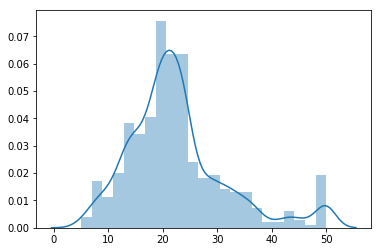

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.linear_model import LinearRegression

In [40]:
gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}

from sklearn.metrics import make_scorer
mse_scorer = make_scorer(mean_squared_error)

clf = model_selection.GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=2,
    scoring=mse_scorer
)

clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

Best parameters found

In [41]:
clf.best_params_

{'fit_intercept': False, 'normalize': True}

Grid scores

In [42]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

25.392 (+/-8.075) for {'fit_intercept': True, 'normalize': True}
25.392 (+/-8.075) for {'fit_intercept': True, 'normalize': False}
28.325 (+/-8.901) for {'fit_intercept': False, 'normalize': True}
28.325 (+/-8.901) for {'fit_intercept': False, 'normalize': False}


In [43]:
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X_train, y_train)
y_pred_ml = model.predict(X_test)
mean_squared_error(y_test, y_pred_ml)

23.62274164395278